**SIMPLE LINEAR REGRESSION**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
df = pd.read_csv("FuelConsumptionCo2.csv")  

In [4]:
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
779,2014,MERCEDES-BENZ,SLS AMG ROADSTER,TWO-SEATER,6.2,8,AS7,Z,18.2,12.6,15.7,18,361
895,2014,PORSCHE,CAYENNE S HYBRID,SUV - STANDARD,3.0,6,A8,Z,11.8,9.9,10.9,26,251
636,2014,LAND ROVER,LR2,SUV - SMALL,2.0,4,AS6,Z,13.5,9.9,11.9,24,274
84,2014,BMW,328i xDRIVE GRAN TURISMO,FULL-SIZE,2.0,4,A8,Z,10.6,7.2,9.1,31,209
573,2014,JEEP,CHEROKEE 4X4 Active Drive II,SUV - SMALL,2.4,4,A9,X,11.4,8.6,10.1,28,232


In [5]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [6]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [7]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS' ]]
cdf.sample(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
311,3.6,6,10.2,235
165,3.6,6,10.8,248
310,3.6,6,15.7,251
463,2.4,4,9.1,209
483,2.4,4,8.7,200


array([[<Axes: title={'center': 'ENGINESIZE'}>,
        <Axes: title={'center': 'CYLINDERS'}>],
       [<Axes: title={'center': 'FUELCONSUMPTION_COMB'}>,
        <Axes: title={'center': 'CO2EMISSIONS'}>]], dtype=object)

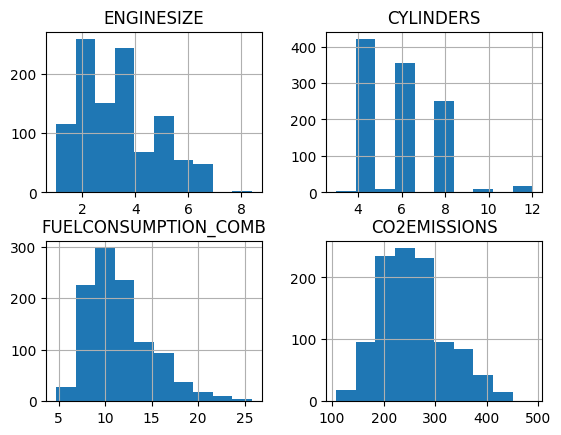

In [8]:
viz = cdf[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS' ]]
viz.hist()

Text(0, 0.5, 'CO2EMISSIONS')

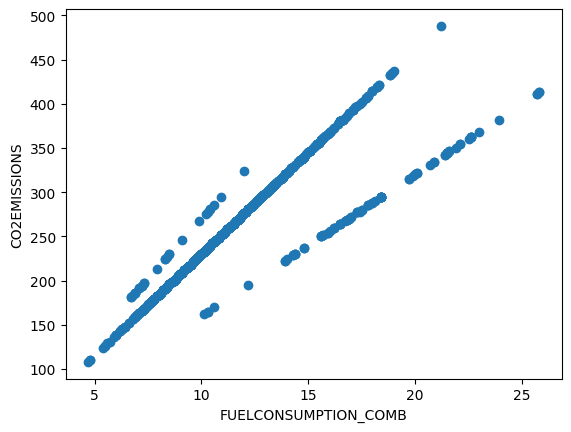

In [9]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS)
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")

Text(0, 0.5, 'CO2EMISSIONS')

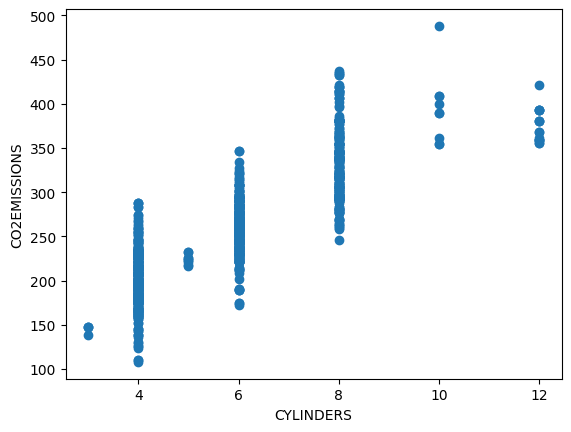

In [10]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS)
plt.xlabel("CYLINDERS")
plt.ylabel("CO2EMISSIONS")

(0.0, 25.0)

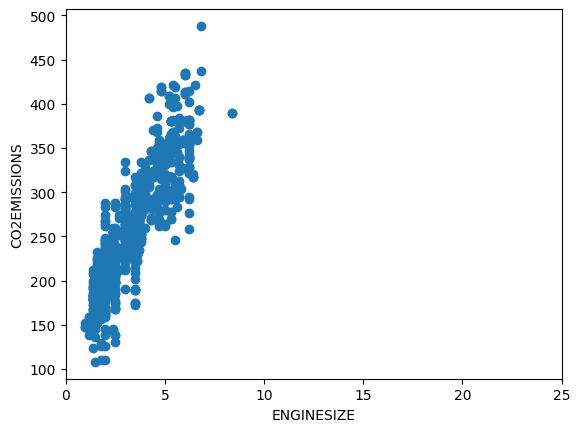

In [11]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS)
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.xlim(0,25)

In [12]:
X = cdf.ENGINESIZE.to_numpy()
Y = cdf.CO2EMISSIONS.to_numpy()

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state= 42)

In [14]:
type(X_test), np.shape(X_test), np.ndim(X_test)

(numpy.ndarray, (214,), 1)

In [15]:
from sklearn import linear_model

regressor =linear_model.LinearRegression()
regressor.fit(X_train.reshape(-1,1), Y_train)

print("Regressor Coefficient: ", regressor.coef_[0])
print("Regressor Intercept: ",regressor.intercept_)

Regressor Coefficient:  38.992978724434074
Regressor Intercept:  126.28970217408721


Text(0, 0.5, 'Emission')

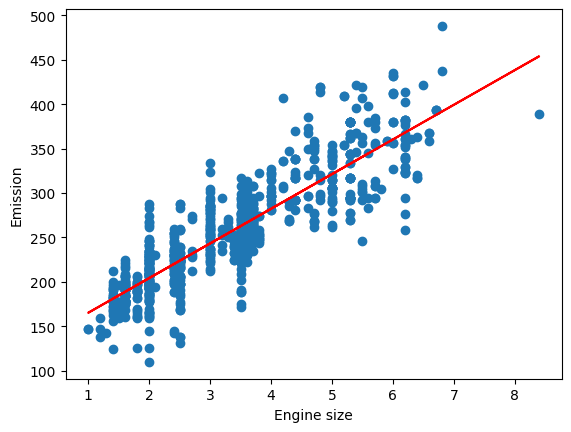

In [16]:
plt.scatter(X_train, Y_train)
plt.plot(X_train, regressor.coef_ * X_train + regressor.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Y_testM = regressor.predict(X_test.reshape(-1,1))

print("Mean absolute error: %.2f" % mean_absolute_error(Y_test, Y_testM))
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_testM))
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(Y_test, Y_testM)))
print("R2-score: %.2f" % r2_score(Y_test, Y_testM))

Mean absolute error: 24.10
Mean squared error: 985.94
Root mean squared error: 31.40
R2-score: 0.76


Text(0, 0.5, 'Emission')

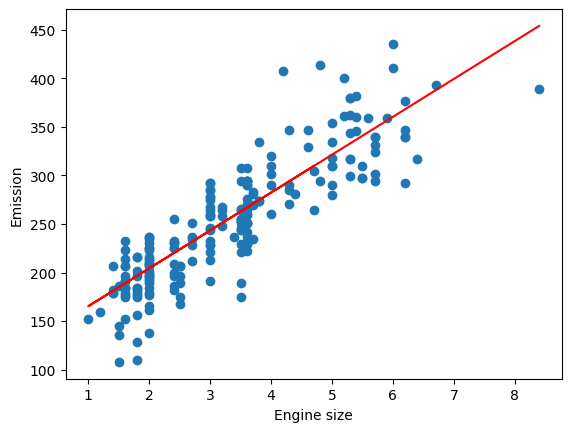

In [18]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, regressor.intercept_ + X_test * regressor.coef_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [19]:
X = cdf.FUELCONSUMPTION_COMB.to_numpy()

**Multiple Linear Regression**

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [21]:
df1 = pd.read_csv("FuelConsumptionCo2.csv")  

In [22]:
df1.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [23]:
df1 = df1.drop(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE',], axis=1)

In [24]:
df1.corrwith(df1["CO2EMISSIONS"])

ENGINESIZE                  0.874154
CYLINDERS                   0.849685
FUELCONSUMPTION_CITY        0.898039
FUELCONSUMPTION_HWY         0.861748
FUELCONSUMPTION_COMB        0.892129
FUELCONSUMPTION_COMB_MPG   -0.906394
CO2EMISSIONS                1.000000
dtype: float64

In [25]:
df1 =df1.drop([ 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',], axis=1)

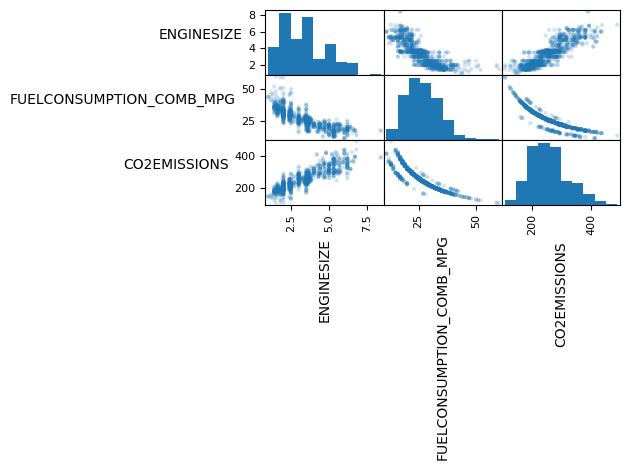

In [26]:
axes = pd.plotting.scatter_matrix(df1, alpha=0.2)

for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

In [27]:
X =df1.iloc[:, [0,1] ].to_numpy()
Y =df1.iloc[:, [2] ].to_numpy()

In [28]:
from sklearn import preprocessing

std_sclaer = preprocessing.StandardScaler() # what it does is subtract the mean and divide by the standard deviation

X_std = std_sclaer.fit_transform(X)

In [29]:
pd.DataFrame(X_std).describe().round(2)

,0,1
count,1067.00,1067.00
mean,0.00,-0.00
std,1.00,1.00
min,-1.66,-2.07
25%,-0.95,-0.73
50%,0.04,-0.06
75%,0.67,0.61
max,3.57,4.50
